In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hyperstrings.hypergraph import Hypergraph


vertices: set[int] = {0, 1, 2, 3, 4, 5, 6, 7}
vertex_sources: dict[int, set[tuple[int, int]]] = {
    0: set(),
    1: {(0, 0)},
    2: {(0, 1), (1, 0), (1, 1), (1, 2)},
    3: {(2, 1)},
    4: {(3, 0)},
    5: {(2, 0)},
    6: set(),
    7: {(3, 1)}
}
vertex_targets: dict[int, set[tuple[int, int]]] = {
    0: {(0, 0), (1, 0), (2, 1)},
    1: {(2, 0)},
    2: {(2, 2), (3, 1)},
    3: {(3, 0)},
    4: set(),
    5: set(),
    6: {(0, 1)},
    7: set()
}
vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'P', 6: 'Q', 7: 'R'
}

hyperedges: set[int] = {0, 1, 2, 3}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6],
    1: [0],
    2: [1, 0, 2],
    3: [3, 2]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1, 2],
    1: [2, 2],
    2: [5, 3],
    3: [4, 7]
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k'
}

inputs: list[int] = [0]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

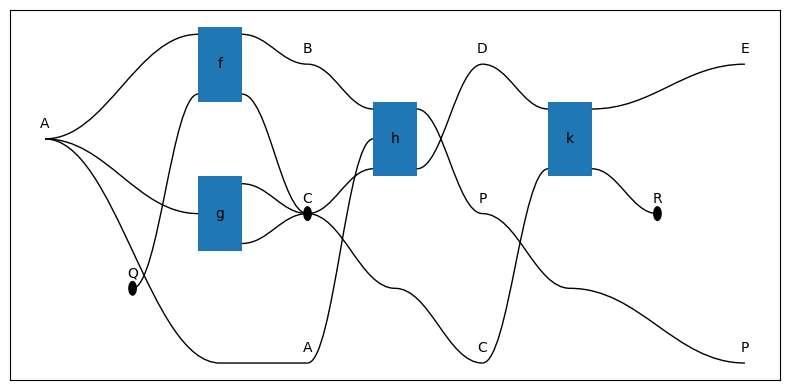

In [4]:
hypergraph.draw_matplotlib()

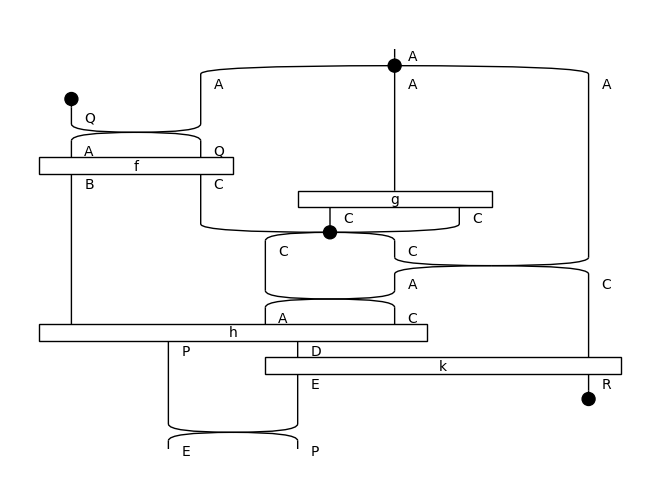

In [5]:
discopy_diagram = hypergraph.to_discopy().to_diagram()
discopy_diagram.draw()

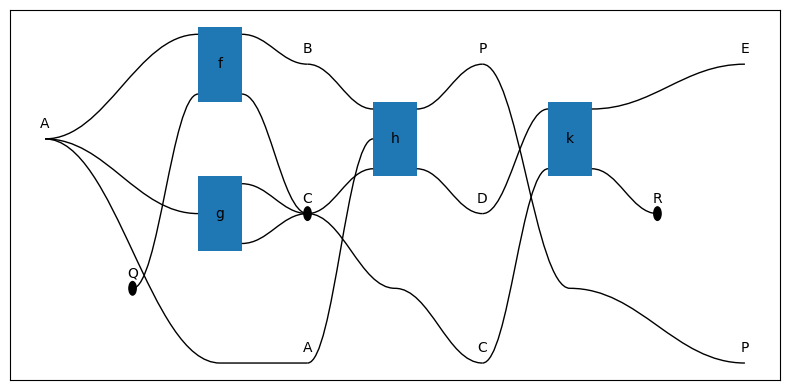

In [6]:
hypergraph.from_discopy(discopy_diagram).draw_matplotlib()

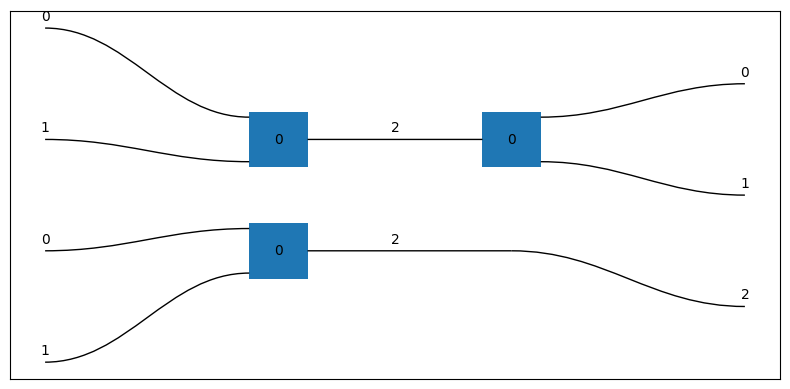

In [7]:
from yarrow import FiniteFunction, BipartiteMultigraph, Diagram

a = FiniteFunction(3, [0, 1])
b = FiniteFunction(3, [2])
xn = FiniteFunction(1, [0])

f = Diagram.singleton(a, b, xn)
g = Diagram.singleton(b, a, xn)

yarrow_diagram = (f >> g) @ f

hypergraph_2 = Hypergraph.from_yarrow(yarrow_diagram)
hypergraph_2.draw_matplotlib()

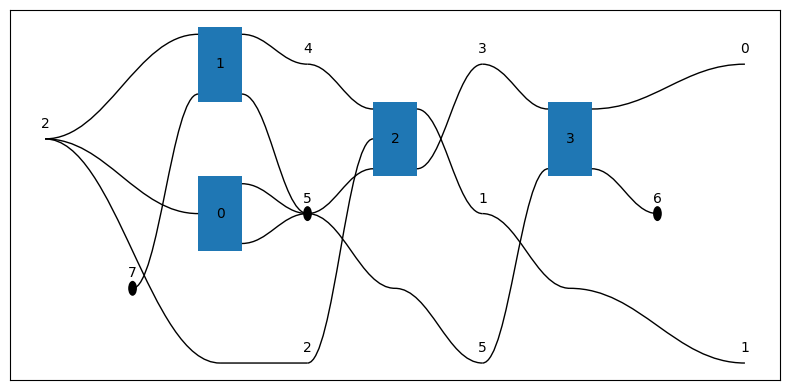

In [10]:
Hypergraph.from_yarrow(hypergraph.to_yarrow()).draw_matplotlib()